In [1]:
pathtorepo = "C:\\Users\\Alex\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [25]:
using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, LinearAlgebra
E, x, y  = 0..20, 0..20,  0..20
box = E × x × y
using CairoMakie, GLMakie;

In [3]:
function RMA(u, p, t)
    x,y,z = u
    r, k, a1, b1, a2, b2, d1, d2 = p
    
   ẋ = x * ( r * ( 1 - x/k ) - a1 * y / ( 1 + b1 * x ) )
   ẏ = y * ( a1 * x / ( 1 + b1 * x ) - a2 * z / ( 1 + b2 * y ) - d1 )
   ż = z * ( a2 * y / ( 1 + b2 * y ) - d2 )
    return SVector(ẋ , ẏ, ż)
end

RMA (generic function with 1 method)

In [4]:
function jac_RMA(u, p, t)
    x,y,z = u
    r, k, a1, b1, a2, b2, d1, d2 = p

    fx = x * ( -r/k + a1 *y * b1 / (b1 * x + 1)^2 ) + r * (1 - x/k) - a1*y/(1+b1*x) 
    gy = -a2 * z / ( b2 * y + 1 ) + a2 * b2 * z * y / ( b2 * y + 1 )^2 + a1 * x / (b1 * x + 1) - d1
    hz = a2 * y / ( 1 + b2 * y ) - d2

    fy = -a1 * x / (1 + b1 * x)
    gz = -a2 * y / (1 + b2 * y)

    gx = y * a1 / ( b1 * x + 1 )^2
    hy = z * a2 / ( b2 * y + 1 )^2

    return SMatrix{3, 3}( fx, gx, 0.0,
                    fy, gy, hy,
                    0.0, gz, hz )
end

jac_RMA (generic function with 1 method)

In [5]:
a1 = 5; a2 = 0.1; b1 = 3; b2 = 2; d1 = 0.4; d2 = 0.01

0.01

In [6]:
r = 1.2
k = 1.063
p = [r, k, a1, b1, a2, b2, d1, d2]

8-element Vector{Float64}:
 1.2
 1.063
 5.0
 3.0
 0.1
 2.0
 0.4
 0.01

In [8]:
t = 5000; tt = 10000;

In [10]:
integrator_setting = (alg = RK4(), adaptive = false, dt = 0.01);

In [74]:
prob = ODEProblem(RMA, sol[end], (0.0, 1200), p)
sol = solve(prob, alg = RK4(), adaptive = false, dt = 0.001);

In [94]:
p1 = [1.2, 1.065, a1, b1, a2, b2, d1, d2]
prob1 = ODEProblem(RMA, sol1[end], (0.0, 1200), p1)
sol1 = solve(prob1, alg = RK4(), adaptive = false, dt = 0.001);

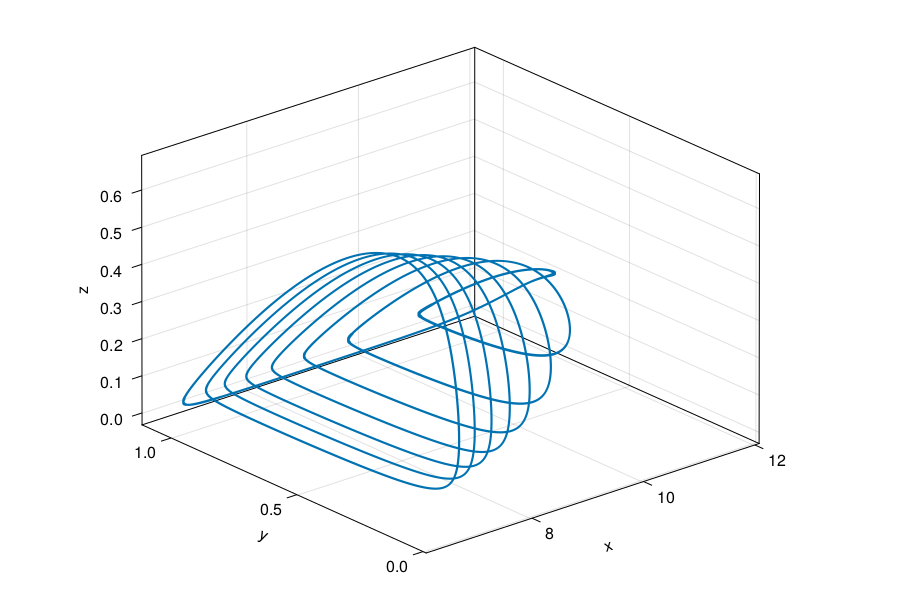

CairoMakie.Screen{IMAGE}


In [98]:
ts, tf = 1, 500000
CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1])
lines!(ax, sol1[3, ts:tf], sol1[1, ts:tf], sol1[2, ts:tf], linewidth = 2.0)
idxfp = 1
#scatter!(ax, fp[idxfp][1], fp[idxfp][2], fp[idxfp][3], color = :deeppink)
display(f)

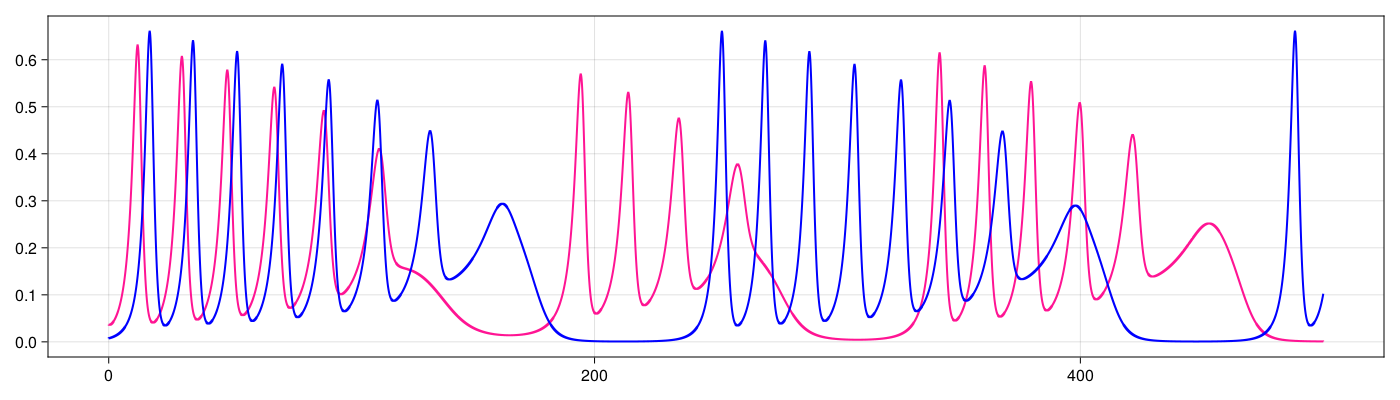

CairoMakie.Screen{IMAGE}


In [99]:
CairoMakie.activate!()
f = Figure(resolution = (1400, 400))
ax = Axis(f[1, 1])

lines!(ax, sol.t[ts:tf], sol[2, ts:tf], linewidth = 2.0, color = :deeppink)
lines!(ax, sol1.t[ts:tf], sol1[2, ts:tf], linewidth = 2.0, color = :blue)
display(f)